# Práctica: detector de idioma

<img src="img/multilingual.png" style="width:400px;">

En esta práctica vamos a construir un detector automático de idioma, capaz de discriminar texto de 20 idiomas diferentes. Para ello vamos a utilizar únicamente método basados en análisis de caracteres, que sin embargo resultan ser muy efectivos para este problema.

## Instrucciones

A lo largo de este cuaderno encontrarás celdas vacías que tendrás que rellenar con tu propio código. Sigue las instrucciones del cuaderno y presta especial atención a los siguientes iconos:

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Deberás responder a la pregunta indicada con el código o contestación que escribas en la celda inferior.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Esto es una pista u observación que te puede ayudar a resolver la práctica.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">Este es un ejercicio avanzado y voluntario que puedes realizar si quieres profundar más sobre el tema. Te animamos a intentarlo para aprender más ¡Ánimo!</td></tr>
</table>

Para evitar problemas de compatibilidad y de paquetes no instalados, se recomienda ejecutar este notebook bajo uno de los [entornos recomendados de Text Mining](https://github.com/albarji/teaching-environments/tree/master/textmining).

Adicionalmente si necesitas consultar la ayuda de cualquier función python puedes colocar el cursor de escritura sobre el nombre de la misma y pulsar Mayúsculas+Shift para que aparezca un recuadro con sus detalles. Ten en cuenta que esto únicamente funciona en las celdas de código.

¡Adelante!

## Carga y preparación de datos

Para este ejercicio usaremos el corpus de muestras de frases de diferentes idiomas que puede obtenerse de Tatoeba: https://tatoeba.org/eng/downloads .

<table>
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
    Descarga el fichero <i>sentences.tar.bz2</i> de la web de Tatoeba y descomprímelo. Crea una variable DATAFILE con la ruta completa al fichero descomprimido.
  </td>
 </tr> 
</table>

In [1]:
####### INSERT YOUR CODE HERE
DATAFILE = "/home/alvaro/Descargas/sentences.csv"

Al tratarse de un fichero en formato TSV (tab separated file) podemos cargarlo como un Dataframe de pandas con facilidad. Si lo has descargado y has indicado la ruta correctamente, la siguiente celda debería cargar los datos y mostrar una porción de los mismos.

In [2]:
import pandas as pd

df = pd.read_csv(DATAFILE, sep="\t", index_col=0, names=["lang", "text"])
df

,lang,text
1,cmn,我們試試看！
2,cmn,我该去睡觉了。
3,cmn,你在干什麼啊？
4,cmn,這是什麼啊？
5,cmn,今天是６月１８号，也是Muiriel的生日！
6,cmn,生日快乐，Muiriel！
7,cmn,Muiriel现在20岁了。
8,cmn,"密码是""Muiriel""。"
9,cmn,我很快就會回來。
10,cmn,我不知道。


Como podemos ver, cada registro contiene una frase (columna "text") y un indicador del idioma al que pertenece (columna "lang"). El indicador de idioma sigue el estándar [ISO 639-3](https://en.wikipedia.org/wiki/List_of_ISO_639-3_codes).

Antes de ponernos a trabajar con los datos debemos limpiarlos un poco. La siguiente comprobación nos demuestra que en el indicador de idioma existen valores desconocidos:

In [3]:
df.isnull().sum()

lang    23
text     0
dtype: int64

Podemos eliminar esos registros inválidos con la siguiente instrucción

In [4]:
df = df.dropna()

Ahora vamos a comprobar qué idiomas hay presentes en los datos. Para ello vamos a utilizar Counter, una estructura que funciona de manera análoga a un diccionario de python, pero que permite llevar la cuenta del número de veces que ha aparecido un elemento.

In [5]:
from collections import Counter

langcounter = Counter(df["lang"])
langcounter

Counter({'cmn': 59742,
         'deu': 452272,
         'rus': 661301,
         'fra': 372727,
         'eng': 1150538,
         'jpn': 186256,
         'spa': 295985,
         'ita': 705053,
         'kor': 3758,
         'vie': 10361,
         'nld': 84053,
         'epo': 583566,
         'tur': 659351,
         'por': 315720,
         'heb': 189925,
         'hun': 233759,
         'ell': 27755,
         'ind': 12012,
         'ara': 31205,
         'arz': 609,
         'fin': 87428,
         'bul': 24162,
         'yue': 5718,
         'swe': 33808,
         'ukr': 131788,
         'bel': 8220,
         'que': 397,
         'ces': 28239,
         'swh': 443,
         'nno': 1162,
         'wuu': 4311,
         'nob': 13320,
         'zsm': 2291,
         'est': 2953,
         'kat': 901,
         'pol': 96243,
         'lat': 30711,
         'urd': 1930,
         'sqi': 1270,
         'isl': 11064,
         'fry': 200,
         'afr': 3669,
         'ron': 17568,
         'fao': 2

¡Son 331 idiomas! Para centrar este ejercicio vamos a focalizarnos en los 20 idiomas más representativos. Podemos obtener 20 los elementos más frecuentes de un Counter de la siguiente manera:

In [6]:
langcounter.most_common(20)

[('eng', 1150538),
 ('ita', 705053),
 ('rus', 661301),
 ('tur', 659351),
 ('epo', 583566),
 ('deu', 452272),
 ('fra', 372727),
 ('por', 315720),
 ('spa', 295985),
 ('hun', 233759),
 ('heb', 189925),
 ('jpn', 186256),
 ('ber', 168951),
 ('ukr', 131788),
 ('pol', 96243),
 ('fin', 87428),
 ('nld', 84053),
 ('mkd', 77647),
 ('kab', 61254),
 ('cmn', 59742)]

Esto nos devuelve los 20 elementos más frecuentes, junto con sus frecuencias de aparición. Entre los idiomas más frecuentes encontramos el inglés, italiano, ruso, turco, alemán, español, hebreo, japonés, finlandes, chino mandarín, ...

<table>
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
      Crea una variable <b>commonlangs</b> que sea una lista con los nombres de esos 20 idiomas más frecuentes. Tendrás que tomar la salida del método most_common y quedarte solo con los nombres de los idiomas.
  </td>
 </tr> 
</table>

In [7]:
####### INSERT YOUR CODE HERE
commonlangs = [lang for lang, count in langcounter.most_common(20)]

Si todo es correcto, la siguiente línea debería filtrar los datos para quedarnos solo con las frases de esos 20 idiomas.

In [8]:
df = df[df["lang"].isin(commonlangs)]
df

,lang,text
1,cmn,我們試試看！
2,cmn,我该去睡觉了。
3,cmn,你在干什麼啊？
4,cmn,這是什麼啊？
5,cmn,今天是６月１８号，也是Muiriel的生日！
6,cmn,生日快乐，Muiriel！
7,cmn,Muiriel现在20岁了。
8,cmn,"密码是""Muiriel""。"
9,cmn,我很快就會回來。
10,cmn,我不知道。


Ahora que hemos limpiado los datos, vamos a separar las variables de entrada (texto) de las de salida (idiomas). Para poder introducir las etiquetas de idioma en el modelo tendremos que codificarlas de forma numérica: para ello usaremos LabelEncoder de scikit-learn:

In [9]:
from sklearn.preprocessing import LabelEncoder

X = df["text"]
labelencoder = LabelEncoder().fit(df["lang"])
y = labelencoder.transform(df["lang"])

A continuación vamos a separar los datos en un conjunto para entrenar el modelo y otro para hacer las predicciones:

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

Con esto tenemos todo listo para construir el modelo.

## Modelo de uni-gramas

Para empezar vamos a construir un modelo que simplemente tenga en cuenta el tipo de caracteres que aparecen en el texto para tratar de determinar el idioma. Esto significa que vamos a montar un proceso que convierta un texto dado en un vector de frecuencia de caracteres, para luego poder aplicar un sistema de aprendizaje automático sobre los vectores que obtengamos. Esta transformación puede hacerse muy fácilmente empleando la clase CountVectorizer de paquete scikit-learn:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

Esta clase nos da funcionalidad para tomar un listado de textos y convertirlos en una representación numérica. Podemos configurar cómo va a realizarse esta conversión mediante diferentes parámetros a la hora de instancia un <a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html">CountVectorizer</a>:

* **analyzer**: tipo de elementos del texto que vamos a contar para generar la representación vectorial
    * *word*: conteo de palabras o n-gramas de palabras
    * *char*: conteo de caracteres o n-gramas de caracteres
    * *char_wb*: conteo de caracters o n-gramas de caracteres dentro de cada palabra
* **ngram_range**: tupla tipo (n, m) que indica que rango de n-gramas vamos a construir. Con (1, 1) tendremos unigramas, mientras que con (1, 3) contaremos desde unigramas hasta trigramas.
* **min_df**: número (o fracción) mínimo de textos en los que tiene que aparecer un elemento para considerarlo en la cuenta. Con esto podemos obviar palabras o caracteres que aparezcan muy poco y por tanto no sean relevantes.
* **max_df**: número (o fracción) máximo de textos en los que tiene que aparecer un elemento para considerarlo en la cuenta. Con esto podemos obviar palabras o caracteres que aparezcan en casi todos los textos, y por tanto no sean discriminativos.
* **binary**: hacer cuentas binarias (True) al estilo bag-of-words o hacer cuentas reales de elementos (False)
* **lowercase**: convertir automáticamente todos los textos a minúsculas (True) o no (False)

Para el caso que nos ocupa queremos crear un CountVectorizer que analize unigramas de caracteres, lo cual se conseguiría como

In [12]:
vectorizadorejemplo = CountVectorizer(analyzer = "char", ngram_range = (1,1))

Una vez construído podemos convertir una lista de textos a vectores usando el método **fit_transform**:

In [13]:
ejemplos = [
    "The cat sat on the mat",
    "The dog barked at the cat",
    "Dog days"
]
transformados = vectorizadorejemplo.fit_transform(ejemplos)
transformados

<3x16 sparse matrix of type '<class 'numpy.int64'>'
	with 29 stored elements in Compressed Sparse Row format>

Por eficiencia los vectores calculados se almacenan como una matriz comprimida. Podemos ver los contenidos de esta matriz de la siguiente forma:

In [14]:
transformados.toarray()

array([[5, 3, 0, 1, 0, 2, 0, 2, 0, 1, 1, 1, 0, 1, 5, 0],
       [5, 3, 1, 1, 2, 3, 1, 2, 1, 0, 0, 1, 1, 0, 4, 0],
       [1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]], dtype=int64)

¿Qué significa esto? Podemos preguntar a nuestro objeto vectorizador qué vocabulario ha construido con los textos que hemos proporcionado:

In [15]:
vectorizadorejemplo.vocabulary_

{'t': 14,
 'h': 7,
 'e': 5,
 ' ': 0,
 'c': 3,
 'a': 1,
 's': 13,
 'o': 11,
 'n': 10,
 'm': 9,
 'd': 4,
 'g': 6,
 'b': 2,
 'r': 12,
 'k': 8,
 'y': 15}

Esto nos indica a qué entrada de los vectores generados se corresponde cada palabra del vocabulario. Efectivamente, el primer vector de *transformados*, que corresponde a la frase "The cat sat on the mat" nos está indicando que el carácter "a" aparece tres veces  (índice 1 del vector) o que el carácter "c" aparece una vez (índice 3 del vector). 

Podemos obtener una representación más gráfica de la vectorización con la siguiente función auxiliar.

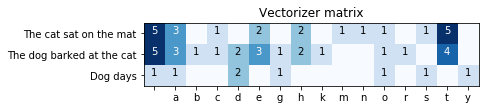

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_vectorizer_matrix(vectorizer, texts, title='Vectorizer matrix', cmap=plt.cm.Blues):
    """
    Generate a visual representation of the matrix produced by a vectorizer over some texts
    """
    np.set_printoptions(precision=2)
    matrix = vectorizer.transform(texts).toarray()

    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    keys = [k for k, v in sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])]
    plt.xticks(np.arange(len(vectorizer.vocabulary_)), keys)
    plt.yticks(range(len(texts)), texts)

    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        if matrix[i, j] > 0:
            plt.text(j, i, format(matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if matrix[i, j] > thresh else "black")

plot_vectorizer_matrix(vectorizadorejemplo, ejemplos)

Aquí vemos claramente el resultado de la vectorización: el texto *Dog days* se ha transformado a un vector que nos indica que en el texto original había presentes los siguientes caracteres: 1 espacio, 1 `a`, 2 `d`, 1 `o`, 1 `s`, y 1 `y`.

Para combinar fácilmente este proceso de vectorización con un modelo de clasificación vamos a usar un **Pipeline** de scikit-learn. En ejercicios posteriores veremos más detalles sobre esto; de momento nos basta con saber que un Pipeline define una serie de etapas del modelo.

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer = "char", ngram_range = (1,1))),
    ('classifier', SGDClassifier(max_iter=1))
    ]
)

Aquí hemos definido un Pipeline que primero aplica la vectorización por frecuencias de caracteres que hemos discutido arriba, y después la pasa a un modelo de clasificación tipo SGDClassifier. Este es un modelo tipo SVM lineal cuya implementación está especializada en trabajar con grandes volúmenes de datos. Dado que contamos con casi 5 millones de frases para entrenar, es suficiente con hacer una sola iteración sobre los datos de entrenamiento.

Una vez definido, entrenamos el modelo con los datos de entrenamiento que habíamos preparado. El entrenamiento debería tardar en torno a 2 minutos.

In [18]:
%%time
model.fit(X_train, y_train)

/home/alvaro/miniconda3/envs/textmining-labs/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


CPU times: user 1min 50s, sys: 816 ms, total: 1min 51s
Wall time: 1min 42s


Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
       ...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

Con el modelo ya entrenado vamos a valorar cómo de bien lo hemos hecho en el conjunto de datos de test. Para ello podemos usar el método score del modelo.

In [19]:
model.score(X_test, y_test)

0.8752225582484985

Deberías haber obtenido en torno a un 86%-87% de accuracy. Para hacer un análisis más en profundidad de la calidad de este modelo, vamos a pintar la matriz de confusión por idiomas. Para ello nos apoyaremos en la siguiente función:

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Ahora generamos las predicciones para el conjunto de test, usamos la función de scikit-learn que calcula la matriz de confusión, y la pintamos con la función definida arriba.

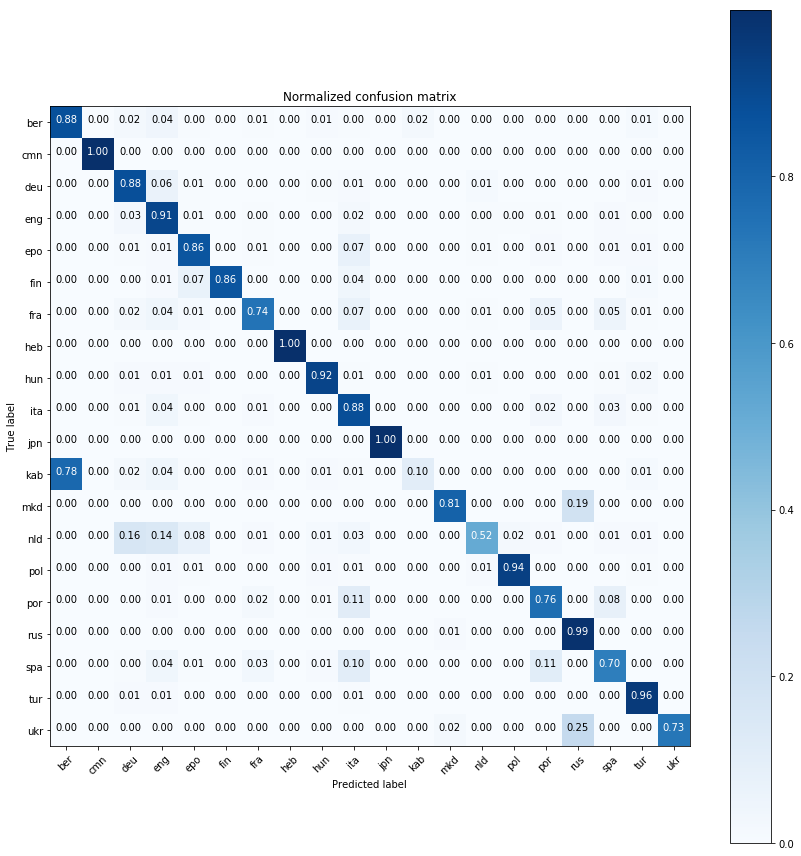

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

La matriz de confusión revela que algunos idiomas son muy fácilmente identificables: chino mandarín, hebreo, japonés y ruso. Esto tiene sentido porque emplean un juego de caracteres muy diferente al de otros idiomas. Sin embargo el modelo confunde mucho entre sí los idiomas que son similares: berebe con cabilio, o español con italiano y portugués.

Podemos hacerlo mejor. Pero para ello tendremos que recurrir a n-gramas de caracteres.

## Modelo de bi-gramas

<table>
 <tr>
  <tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">
      Repite los pasos anteriores para construir un modelo de bi-gramas de caracteres. ¿Obtienes mejor precisión global con este modelo? ¿Qué confusiones han desaparecido en la matriz de confusión? ¿Cuáles permanecen?
  </td>
 </tr> 
</table>

<table>
 <tr>
  <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">
      Revisar la explicación anterior de los parámetros que acepta CountVectorizer. Solo es necesario cambiar este elemento en la definición del Pipeline para obtener el modelo de bigramas.
  </td>
 </tr> 
</table>

In [ ]:
####### INSERT YOUR CODE HERE
model = Pipeline([
    ('vectorizer', CountVectorizer(analyzer = "char", ngram_range = (1,2))),
    ('classifier', SGDClassifier(max_iter=1))
    ]
)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_, normalize=True, title='Normalized confusion matrix')
plt.show()

0.9775524981897176


## Más allá de bi-gramas

Es posible obtener resultados aún mejores si se emplean tri-gramas o tetra-gramas. Pero dado el tamaño del dataset esto puede requerir de un gasto excesivo de memoria. Para evitar esto, será necesario recurrir a otras estrategias de vectorización, como [HashingVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.HashingVectorizer.html).

<table>
 <tr>
  <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">
      Intenta mejorar los resultados del modelo bi-gramas utilizando HashingVectorizer y un mayor orden de n-gramas.
  </td>
 </tr> 
</table>

In [ ]:
####### INSERT YOUR CODE HERE